# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_data = pd.merge(mouse_metadata, study_results, how="right" , on="Mouse ID")
# Display the data table for preview

combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [93]:
# Checking the number of mice.
num_unique_mice = combined_data["Mouse ID"].nunique()

num_unique_mice

249

In [94]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicates = combined_data.duplicated(subset=["Mouse ID" , "Timepoint"], keep=False)
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = combined_data[duplicates]
duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [95]:
# Optional: Get all the data for the duplicate mouse ID. 


In [96]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])

# Mostrar el DataFrame limpio 
cleaned_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [98]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice = cleaned_data["Mouse ID"].nunique()

num_unique_mice


249

## Summary Statistics

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Drug_regimen = combined_data.groupby("Drug Regimen")
summary_statistics = Drug_regimen["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Group the data by "Drug Regimen" and calculate the required summary statistics
summary_stats = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Rename the columns for clarity
summary_stats.rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Tumor Volume Variance",
    "std": "Tumor Volume Std. Dev.",
    "sem": "Tumor Volume SEM"
}, inplace=True)

# Display the summary DataFrame
summary_stats

#summary_statistics



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [100]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_single_line = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics_single_line

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

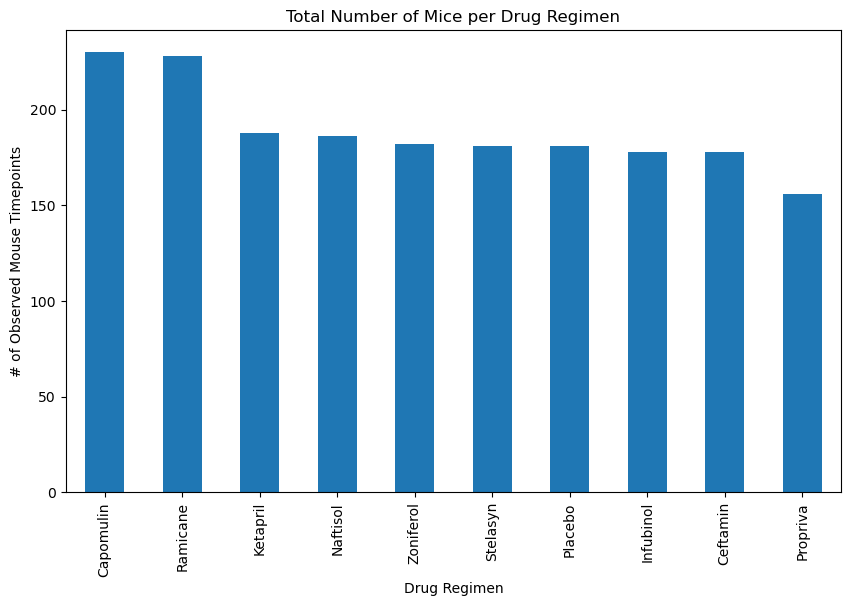

In [101]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = cleaned_data["Drug Regimen"].value_counts()
drug_counts.plot(kind='bar' , figsize=(10, 6))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Number of Mice per Drug Regimen")
plt.show()

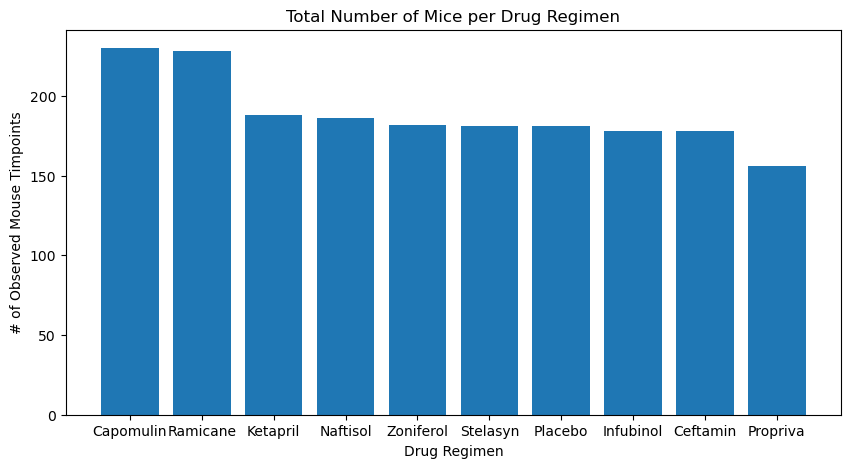

In [102]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs_count = cleaned_data["Drug Regimen"].value_counts()
drug_regimens = drug_counts.index
mice_counts = drug_counts.values 

plt.figure(figsize=(10, 5))
plt.bar(drug_regimens, mice_counts)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timpoints")
plt.title("Total Number of Mice per Drug Regimen")
plt.show()

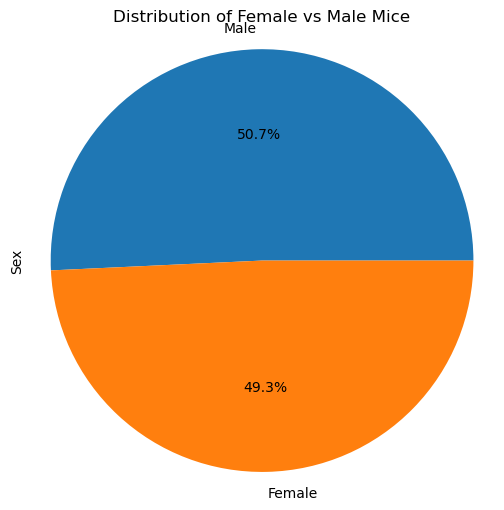

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_data["Sex"].value_counts()
gender_counts.plot.pie(autopct="%1.1f%%",startangle=360, figsize=(6, 6))
plt.title("Distribution of Female vs Male Mice")
plt.axis("equal")
plt.show()

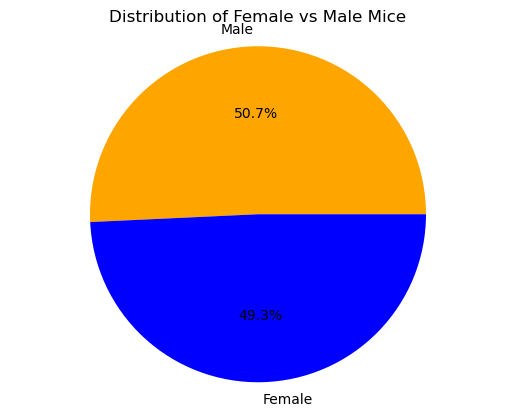

In [104]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = cleaned_data["Sex"].value_counts()
colors = ["orange", "blue"]
plt.pie(gender_counts, labels=gender_counts.index, colors=colors, autopct="%1.1f%%", startangle=360)
plt.title("Distribution of Female vs Male Mice")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [111]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, cleaned_data, on=["Mouse ID", "Timepoint"], how="left")
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [124]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    tumor_volume = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_volume_data.append(tumor_volume)
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
   
      
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 *iqr
    upper_bound = upper_quartile + 1.5 * iqr
    outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]

   
    print(f"--- Treatment Regimen: {treatment} ---")
    print(f"Potential Outliers: {outliers}\n")
    


--- Treatment Regimen: Capomulin ---
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

--- Treatment Regimen: Ramicane ---
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

--- Treatment Regimen: Infubinol ---
Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

--- Treatment Regimen: Ceftamin ---
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



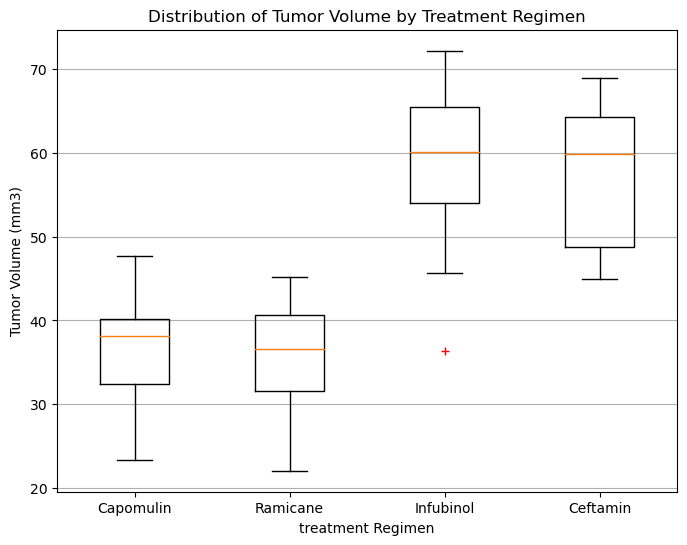

In [125]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 6))
plt.boxplot(tumor_volume_data, labels=treatments, sym="r+")
plt.title("Distribution of Tumor Volume by Treatment Regimen")
plt.xlabel("treatment Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(axis="y")
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = merged_data[merged_data["Drug Regimen"] == "Capomulin"]
selected_mouse = "l509"
mouse_data = capomulin_data[capomulin_data["Mouse ID"] == selected_mouse]
plt.figure(figsize=(8, 6))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"],marker="o",color="blue", linewidth=1)
plt.title("Capomulin treatment of mouse I509")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume(mm3) ")
plt.show()

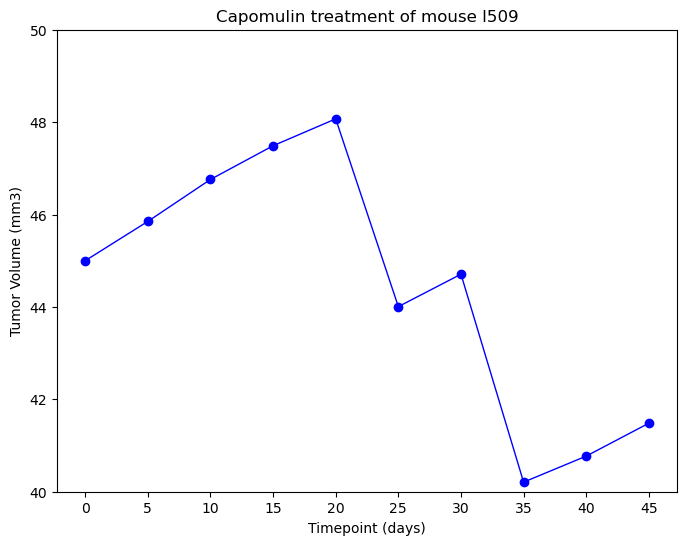

In [172]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]
selected_mouse = "l509"
mouse_data = capomulin_data[capomulin_data["Mouse ID"] == selected_mouse].copy()

# Convert the "Timepoint" column to numeric using .loc accessor
mouse_data.loc[:, "Timepoint"] = mouse_data.loc[:, "Timepoint"].astype(int)

plt.figure(figsize=(8, 6))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker="o", color="blue", linewidth=1)
plt.title(f"Capomulin treatment of mouse {selected_mouse}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(40, 50)  
plt.xticks(range(0, 50, 5))  
plt.show()


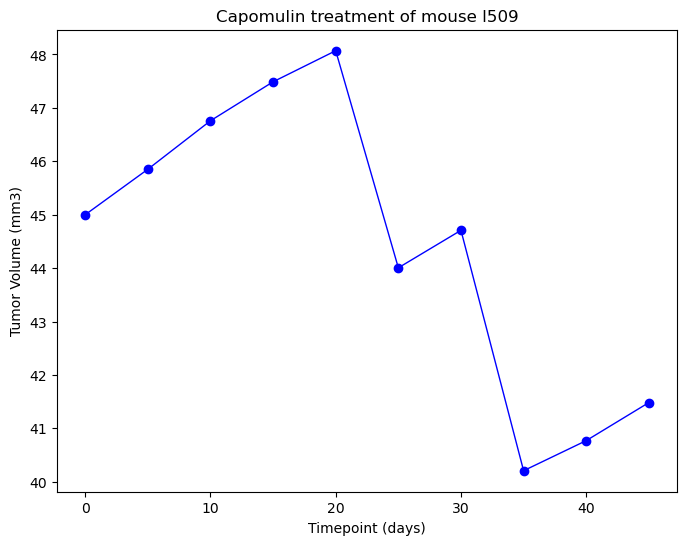

In [169]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
selected_mouse = "l509"
mouse_data = capomulin_data[capomulin_data["Mouse ID"] == selected_mouse].copy()
mouse_data.loc[:, "Timepoint"] = mouse_data.loc[:, "Timepoint"].astype(int)
plt.figure(figsize=(8, 6))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker="o", color="blue", linewidth=1)
plt.title(f"Capomulin treatment of mouse {selected_mouse}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


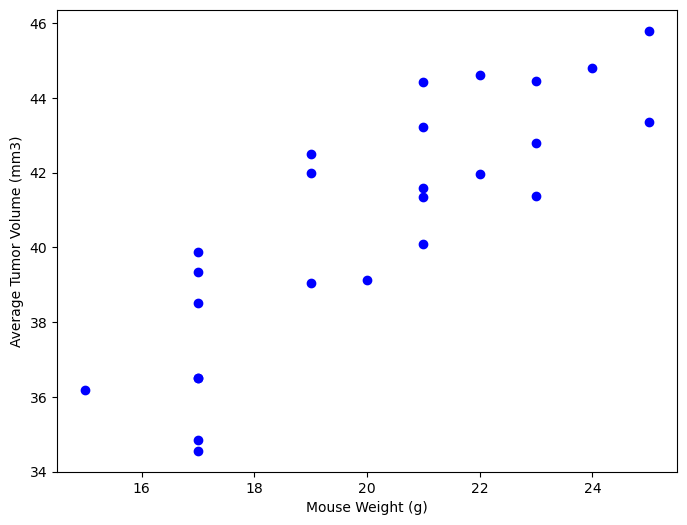

In [176]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Step 2: Group data by mouse weight and calculate the mean tumor volume for each weight category
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Step 3: Generate the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker="o", color="blue")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

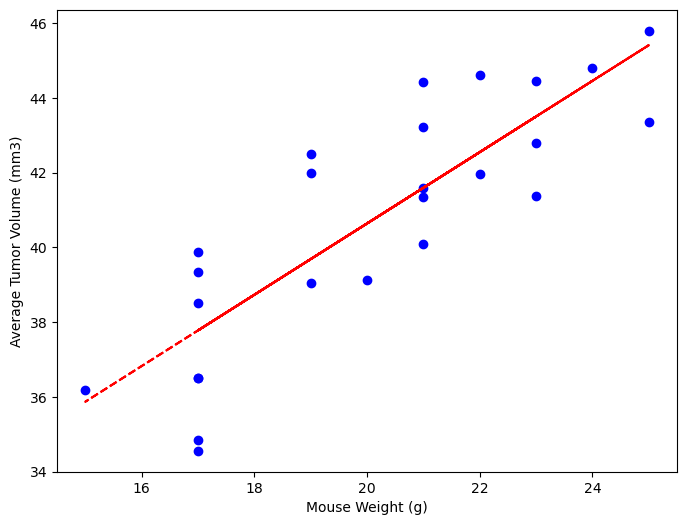

In [181]:
# Calculate the correlation coefficient and a linear regression model 

capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

correlation_coefficient = np.corrcoef(mouse_weight, average_tumor_volume)[0, 1]

slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)

plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker="o", color="blue")
plt.plot(mouse_weight, intercept + slope * mouse_weight, color="red", linestyle="--", label="Regression Line")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
